In [1]:
from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

In [2]:
# create instances of my beautiful classes

cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()

In [3]:
# List of text file paths to build our corpus (where we learn the transitions probs)

file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)

In [4]:
# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt

In [5]:
# compute the transition probs

probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [6]:
min(probability_matrix.probability_table.values())

1.2227497980017334e-07

In [7]:
probability_matrix.save_all_2_chars()
probability_matrix.save_probability_table()

In [8]:
# some text to try

text = "There were better sense in the sad mechanic exercise of determining the reason of its absence where it is not. In the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love; there are at least five with whom, as it seems to me, no man of taste and spirit can help doing so."
# text = "I do not believe a word of it, my dear. If he had been so very agreeable, he would have talked to Mrs. Long. But I can guess how it was"
# text = "Your plan is a good one,” replied Elizabeth, “where nothing is in question but the desire of being well married; and if I were determined to get a rich husband, or any husband, I dare say I should adopt it. But these are not Jane’s feelings"
text = "she is not acting by design. As yet she cannot even be certain of the degree of her own regard, nor of its reasonableness. She has known him only a fortnight. She danced four dances with him at Meryton; she saw him one morning at his own house, and has since dined in company with him four times."

In [9]:
# encode and decode a sample text with a generated cipher

text = preprocess.lower(text)
text = preprocess.remove_unknown_chars(
    text, unknown_chars=preprocess.unknown_chars(text)
)
text = preprocess.remove_additional_spaces(text)


cipher = cipher_generator.generate_cipher()

encoded_text = text_encoder.encode_text(text, cipher)
decoded_text = text_decoder.decode_text(encoded_text, cipher)

print("Original Text:", text)
print("Encoded Text:", encoded_text)
print("Decoded Text:", decoded_text)

Original Text: she is not acting by design as yet she cannot even be certain of the degree of her own regard nor of its reasonableness she has known him only a fortnight she danced four dances with him at meryton she saw him one morning at his own house and has since dined in company with him four times
Encoded Text: ula fu zhg icgfzs km paufsz iu mag ula cizzhg ayaz ka cadgifz hr gla pasdaa hr lad htz dasidp zhd hr fgu daiuhzikxazauu ula liu ozhtz lfj hzxm i rhdgzfslg ula pizcap rhbd pizcau tfgl lfj ig jadmghz ula uit lfj hza jhdzfzs ig lfu htz lhbua izp liu ufzca pfzap fz chjqizm tfgl lfj rhbd gfjau
Decoded Text: she is not acting by design as yet she cannot even be certain of the degree of her own regard nor of its reasonableness she has known him only a fortnight she danced four dances with him at meryton she saw him one morning at his own house and has since dined in company with him four times


In [10]:
# break the cipher with MCMC

cipher_breaker = CipherBreaker(
    starting_cipher=cipher_generator.generate_cipher(),
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)

cipher_breaker.break_cipher(iterations=100000, print_interval=100)

Iter 0: tnf xt dzh ushxdv wb oftxvd ut bfh tnf suddzh fefd wf sfmhuxd za hnf ofvmff za nfm zid mfvumo dzm za xht mfutzduwgfdftt tnf nut rdzid nxl zdgb u azmhdxvnh tnf oudsfo azqm oudsft ixhn nxl uh lfmbhzd tnf tui nxl zdf lzmdxdv uh nxt zid nzqtf udo nut txdsf oxdfo xd szlcudb ixhn nxl azqm hxlft
Iter 100: the at nor icrang vw setagn it wer the cinnor eben ve cedrian ol rhe segdee ol hed omn degids nod ol art deitonivqenett the hit knomn haf onqw i lodrnaghr the sinces loud sincet marh haf ir fedwron the tim haf one fodnang ir hat omn houte ins hit tance sanes an cofxinw marh haf loud rafet
Iter 200: the at nos icsang vd letagn it des the cinnos epen ve cersian of she legree of her omn regirl nor of ast reitonivbenett the hit wnomn hay onbd i forsnaghs the lincel four lincet mash hay is yerdson the tim hay one yornang is hat omn houte inl hit tance lanel an coyqind mash hay four sayet
Iter 300: the at nos icsang vd letagn it des the cinnos epen ve cersian of she legree of her omn regir

['i',
 'k',
 'c',
 'p',
 'a',
 'r',
 's',
 'l',
 'f',
 'e',
 'n',
 'x',
 'j',
 'z',
 'h',
 'q',
 'o',
 'd',
 'g',
 'u',
 'b',
 'y',
 't',
 'v',
 'm',
 'w']

In [11]:
cipher_breaker.extract_best(
    n_extract=10, return_likelihood=True
)  # Extract the best 10 decoded messages along with their likelihood

[('the it nos acsing by detign at yes the cannos even be cersain of she degree of her own regard nor of ist reatonablenett the hat known him only a forsnighs the danced four dancet wish him as meryson the taw him one morning as hit own houte and hat tince dined in comqany wish him four simet',
  -1468.6533753141293),
 ('the it nos acsing by detign at yes the cannos even be cersain of she degree of her own regard nor of ist reatonablenett the hat known him only a forsnighs the danced four dancet wish him as meryson the taw him one morning as hit own houte and hat tince dined in company wish him four simet',
  -1469.2531619587019),
 ('she is not acting by design as yet she cannot even be certain of the degree of her own regard nor of its reasonableness she has known him only a fortnight she danced four dances with him at meryton she saw him one morning at his own house and has since dined in comqany with him four times',
  -1469.411590728145),
 ('the it nos acsing by detign at yes the ca

MovieWriter imagemagick unavailable; using Pillow instead.


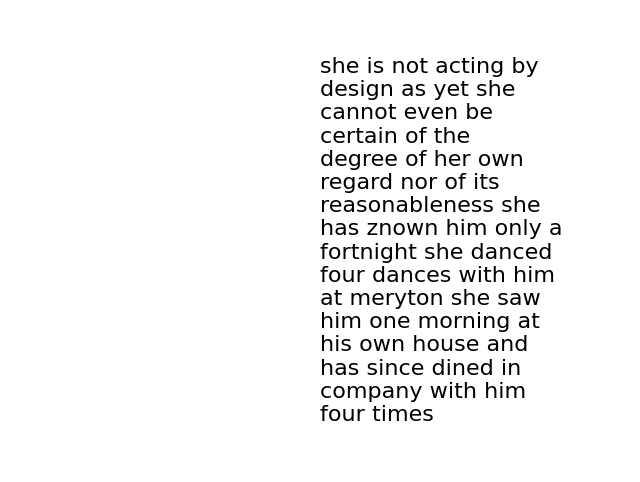

In [12]:
cipher_breaker.generate_animation(filename="she is not.gif")